***Drug Recommendation & Medical condition classifier Flask web app in Python***

In [2]:
# importing the libraries 

import pandas as pd #Analysis 
import matplotlib.pyplot as plt #Visulization
import seaborn as sns #Visulization

import warnings 
warnings.filterwarnings('ignore')


import os
import string
color = sns.color_palette()

%matplotlib inline

from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

from sklearn import model_selection, preprocessing, metrics, ensemble, naive_bayes, linear_model
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


from sklearn.linear_model import PassiveAggressiveClassifier



In [3]:
df1=pd.read_csv('drugs1.tsv',sep='\t')    # train data

In [4]:
df2=pd.read_csv('drugs2.tsv',sep='\t') 
# test data

**Concat**

Both train and test data having same type of data so concating both

In [5]:
df=pd.concat([df1, df2], axis=0)

In [6]:
dff=df      # taking copy of the data set

df1 having 1505441 rows and df2 having 376362 rows ion concating both having 1505441 rows

In [131]:
df.shape

1505441

In [7]:
df.columns         # Features in the dataset

Index(['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [8]:
df.head(1)

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27


.

### Feature Descriptions

1. **`Unnamed: 0`**
   - **Description**: Index or ID column, often redundant. May be dropped.

2. **`drugName`**
   - **Description**: Name of the drug being reviewed. Useful for identifying the specific medication.

3. **`condition`**
   - **Description**: Medical condition being treated with the drug. This is the target variable for classification.

4. **`review`**
   - **Description**: Text of the patient’s review. Key feature for text analysis 

5. **`rating`**
   - **Description**: Numerical rating given to the drug, reflecting patient satisfaction.

6. **`date`**
   - **Description**: Date when the review was posted.

7. **`usefulCount`**
   - **Description**: Number of users who found the review helpful. Helps in identifying impactful reviews.


**Describe_the_object_coumns**

In [6]:
df.describe(include="O")

,drugName,condition,review,date
count,53766,53471,53766,53766
unique,2637,708,48280,3566
top,Levonorgestrel,Birth Control,"""Good.""","April 11, 2017"
freq,1273,9648,8,56


.

**Checking_Missing_value**

In [75]:
df.isnull().sum()

Unnamed: 0        0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64

Text(0.5, 1.0, 'Total Missing Value ')

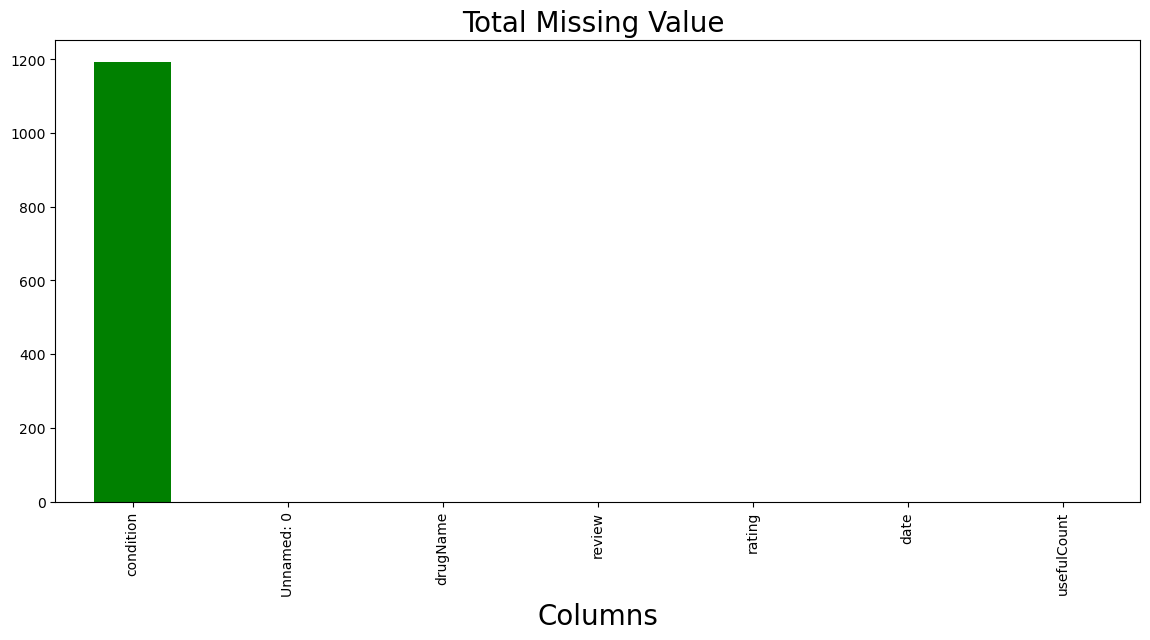

In [7]:
percent = (df.isnull().sum()).sort_values(ascending=False)
percent.plot(kind="bar", figsize = (14,6), fontsize = 10, color='green')
plt.xlabel("Columns", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Total Missing Value ", fontsize = 20)

In [8]:
df[pd.isnull(df['condition'])] 

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
30,51452,Azithromycin,NaN,"""Very good response. It is so useful for me. """,10.0,"August 18, 2010",1
148,61073,Urea,NaN,"""Accurate information.""",10.0,"July 2, 2011",13
488,132651,Doxepin,NaN,"""So far so good. Good for me and I can take it...",10.0,"October 20, 2010",25
733,44297,Ethinyl estradiol / norgestimate,NaN,"""I haven&#039;t been on it for a long time and...",8.0,"January 24, 2011",1
851,68697,Medroxyprogesterone,NaN,"""I started the shot in July 2015 and ended in ...",6.0,"March 23, 2017",1
...,...,...,...,...,...,...,...
52424,170508,Quetiapine,NaN,"""good for insomnia most of the time""",7.0,"May 27, 2015",10
52488,104629,Ethinyl estradiol / levonorgestrel,NaN,"""I am almost on my third month of my first pac...",5.0,"April 25, 2011",4
52617,104642,Ethinyl estradiol / levonorgestrel,NaN,"""I have been taking this birth control for two...",10.0,"January 11, 2011",1
52742,720,Medroxyprogesterone,NaN,"""I have been using the shot for 7 years now an...",10.0,"April 21, 2011",1


In [9]:
df.shape

(215063, 7)

In [10]:
#dropping null value
df = df.dropna(axis=0)

In [11]:
df.isnull().sum()   #checking nullvalues is there or not after dropping null values

Unnamed: 0     0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

In [11]:
df.shape

(213869, 7)

In [12]:
df[df.duplicated()]     #no duplicates 

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount


.

**Condition_vs_no_of_drugs_availabe**

Text(0.5, 1.0, 'Top20 : The number of drugs per condition.')

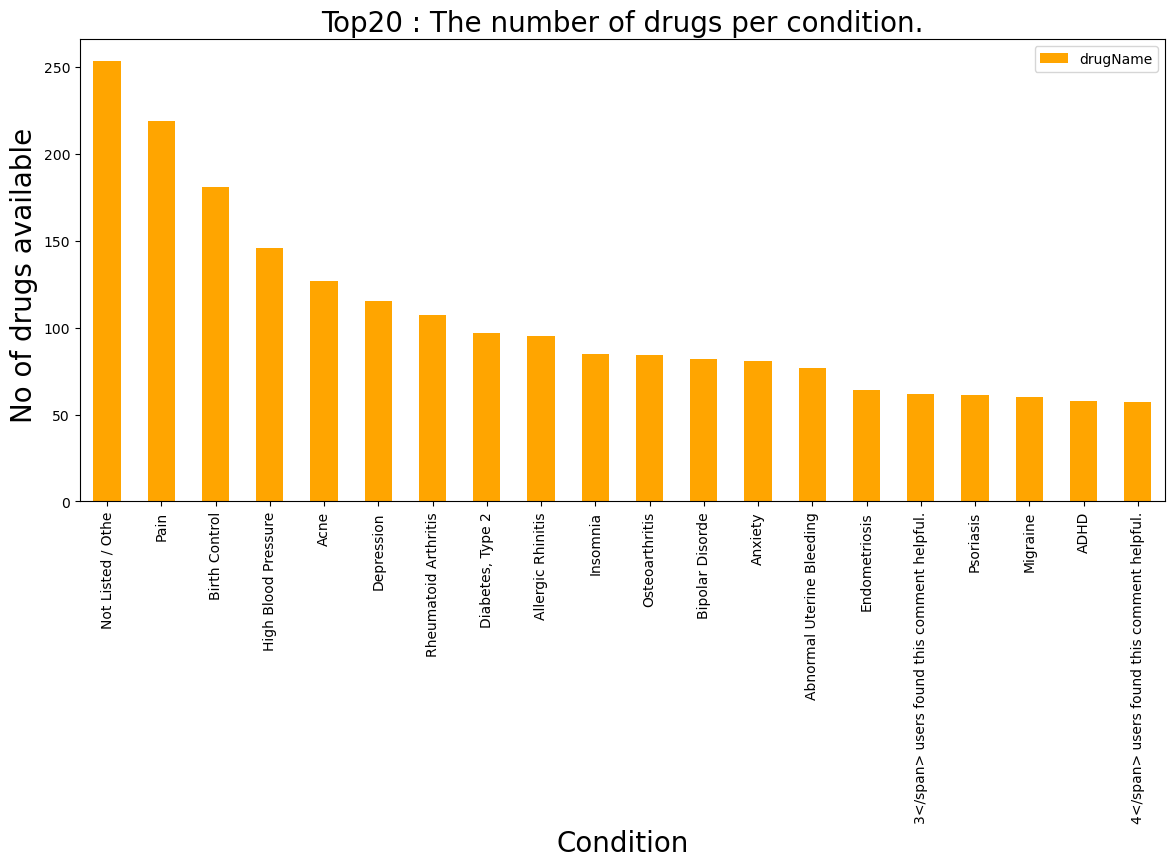

In [13]:
s=pd.DataFrame(df.groupby(by=['condition'])['drugName'].nunique().sort_values(ascending=False))
s[0:20].plot(kind="bar", figsize = (14,6), fontsize = 10,color="orange")
plt.xlabel("Condition", fontsize = 20)
plt.ylabel("No of drugs available ", fontsize = 20)
plt.title("Top20 : The number of drugs per condition.", fontsize = 20)

In [ ]:
                                                                                        2

In [ ]:
df[df['condition']=='Not Listed / Othe']

In [ ]:
df[df['condition']=='3</span> users found this comment helpful.']

In [ ]:
df.head()

.

**Creating_cloud_word_for_review_feature**

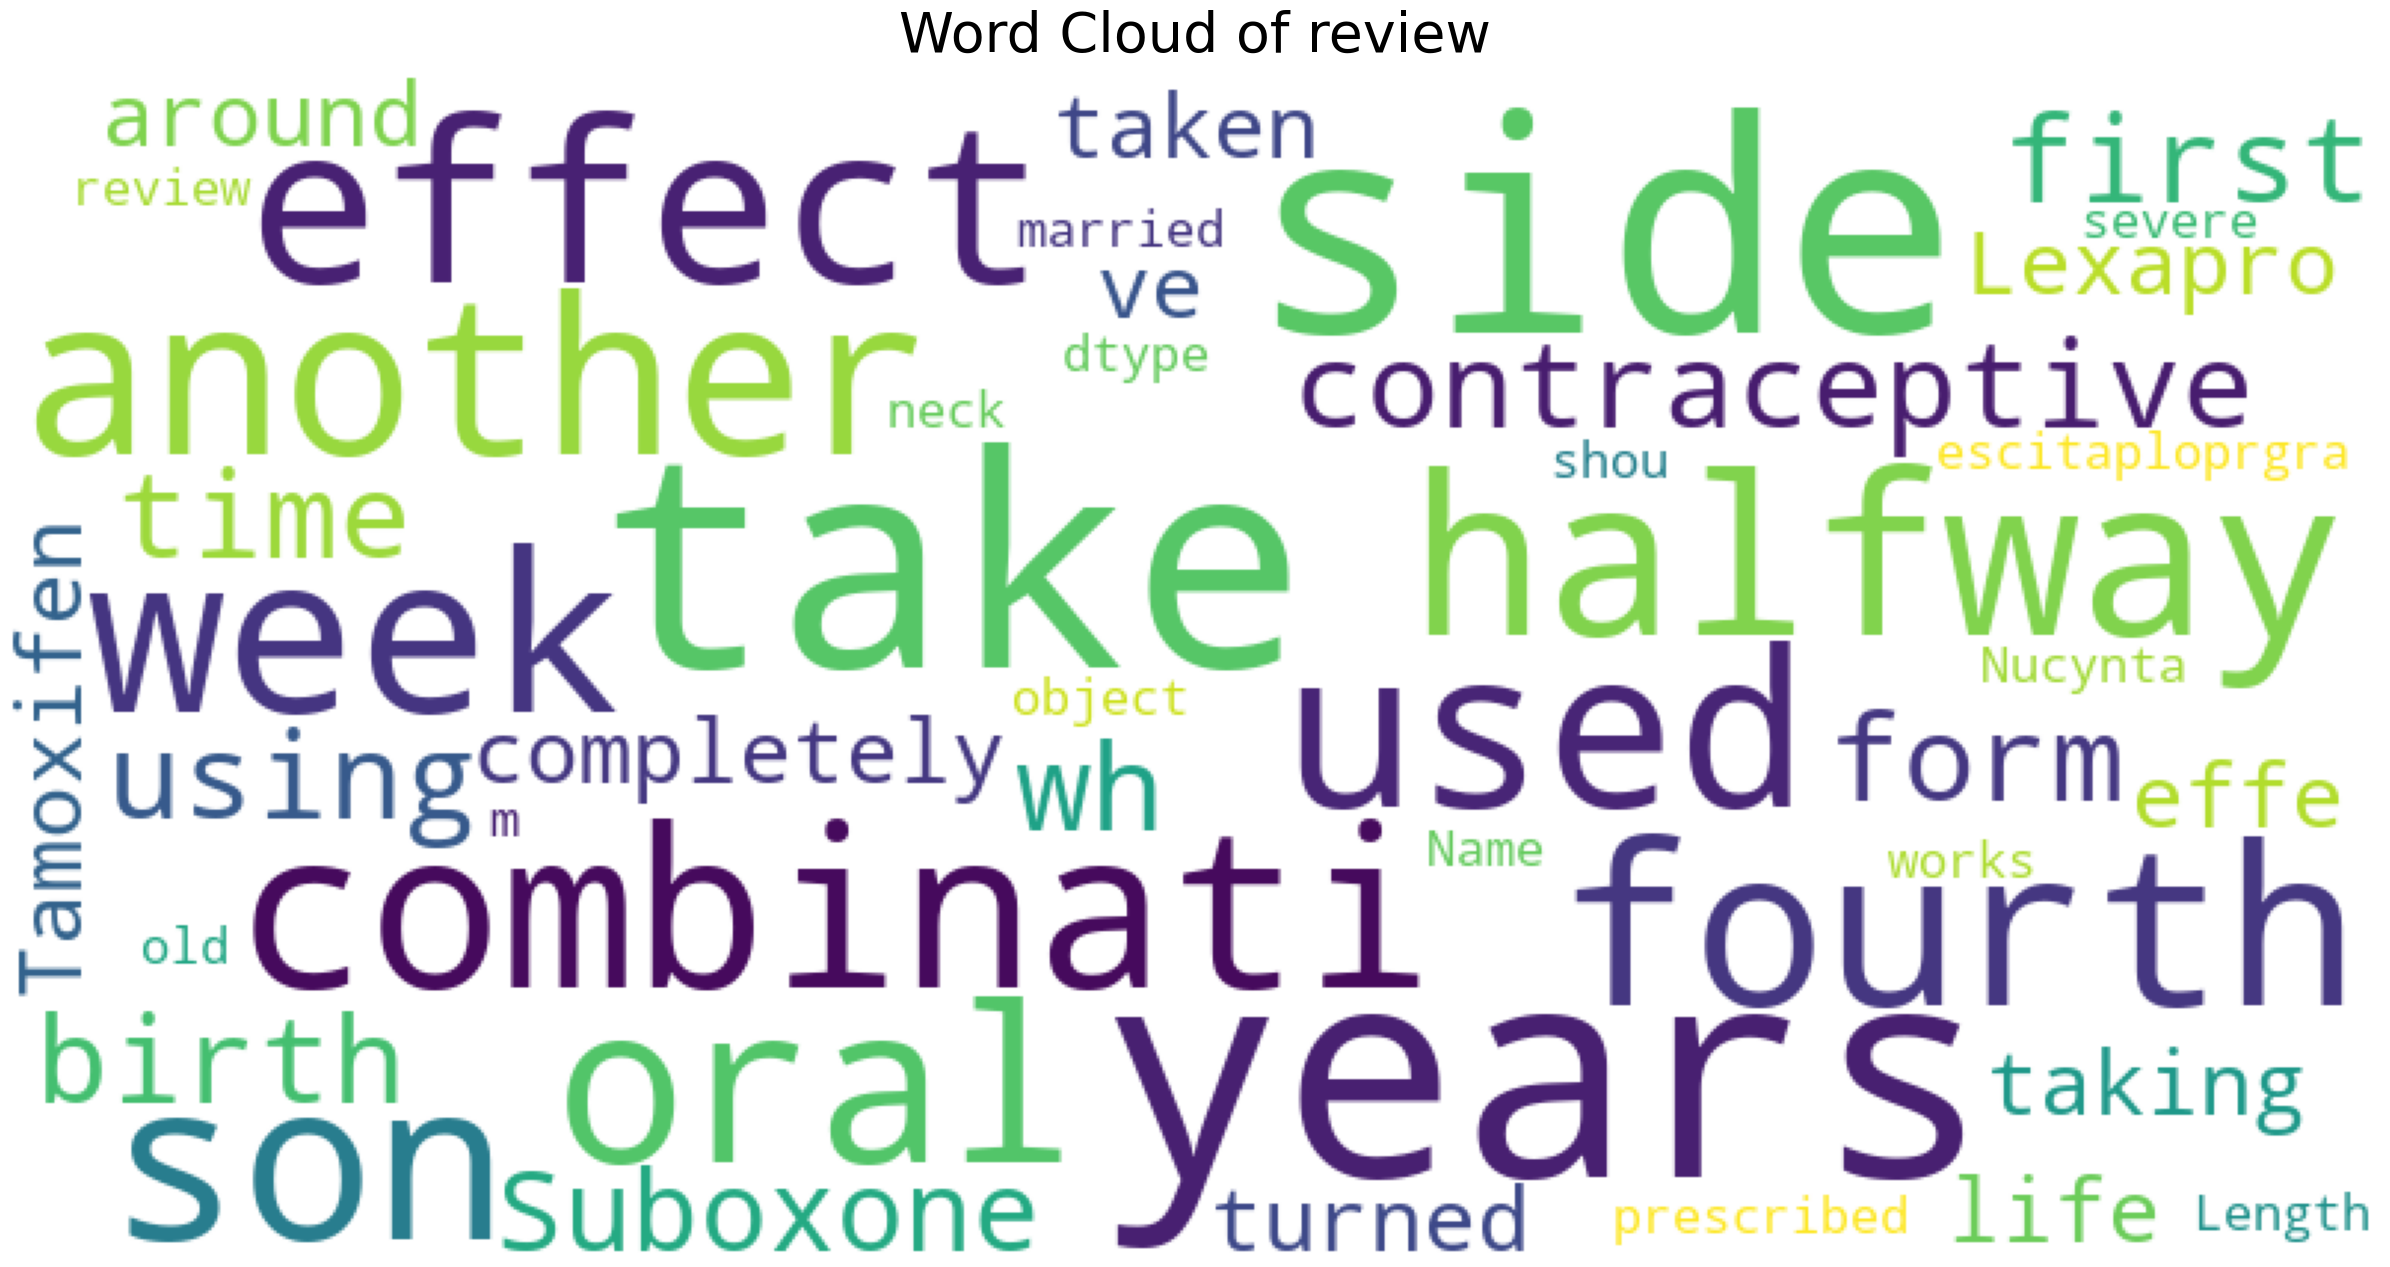

In [14]:
from wordcloud import WordCloud, STOPWORDS

def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
print()
print()
plot_wordcloud(df["review"], title="Word Cloud of review")


.

.

****Creating_cloud_word_for_DrugName****

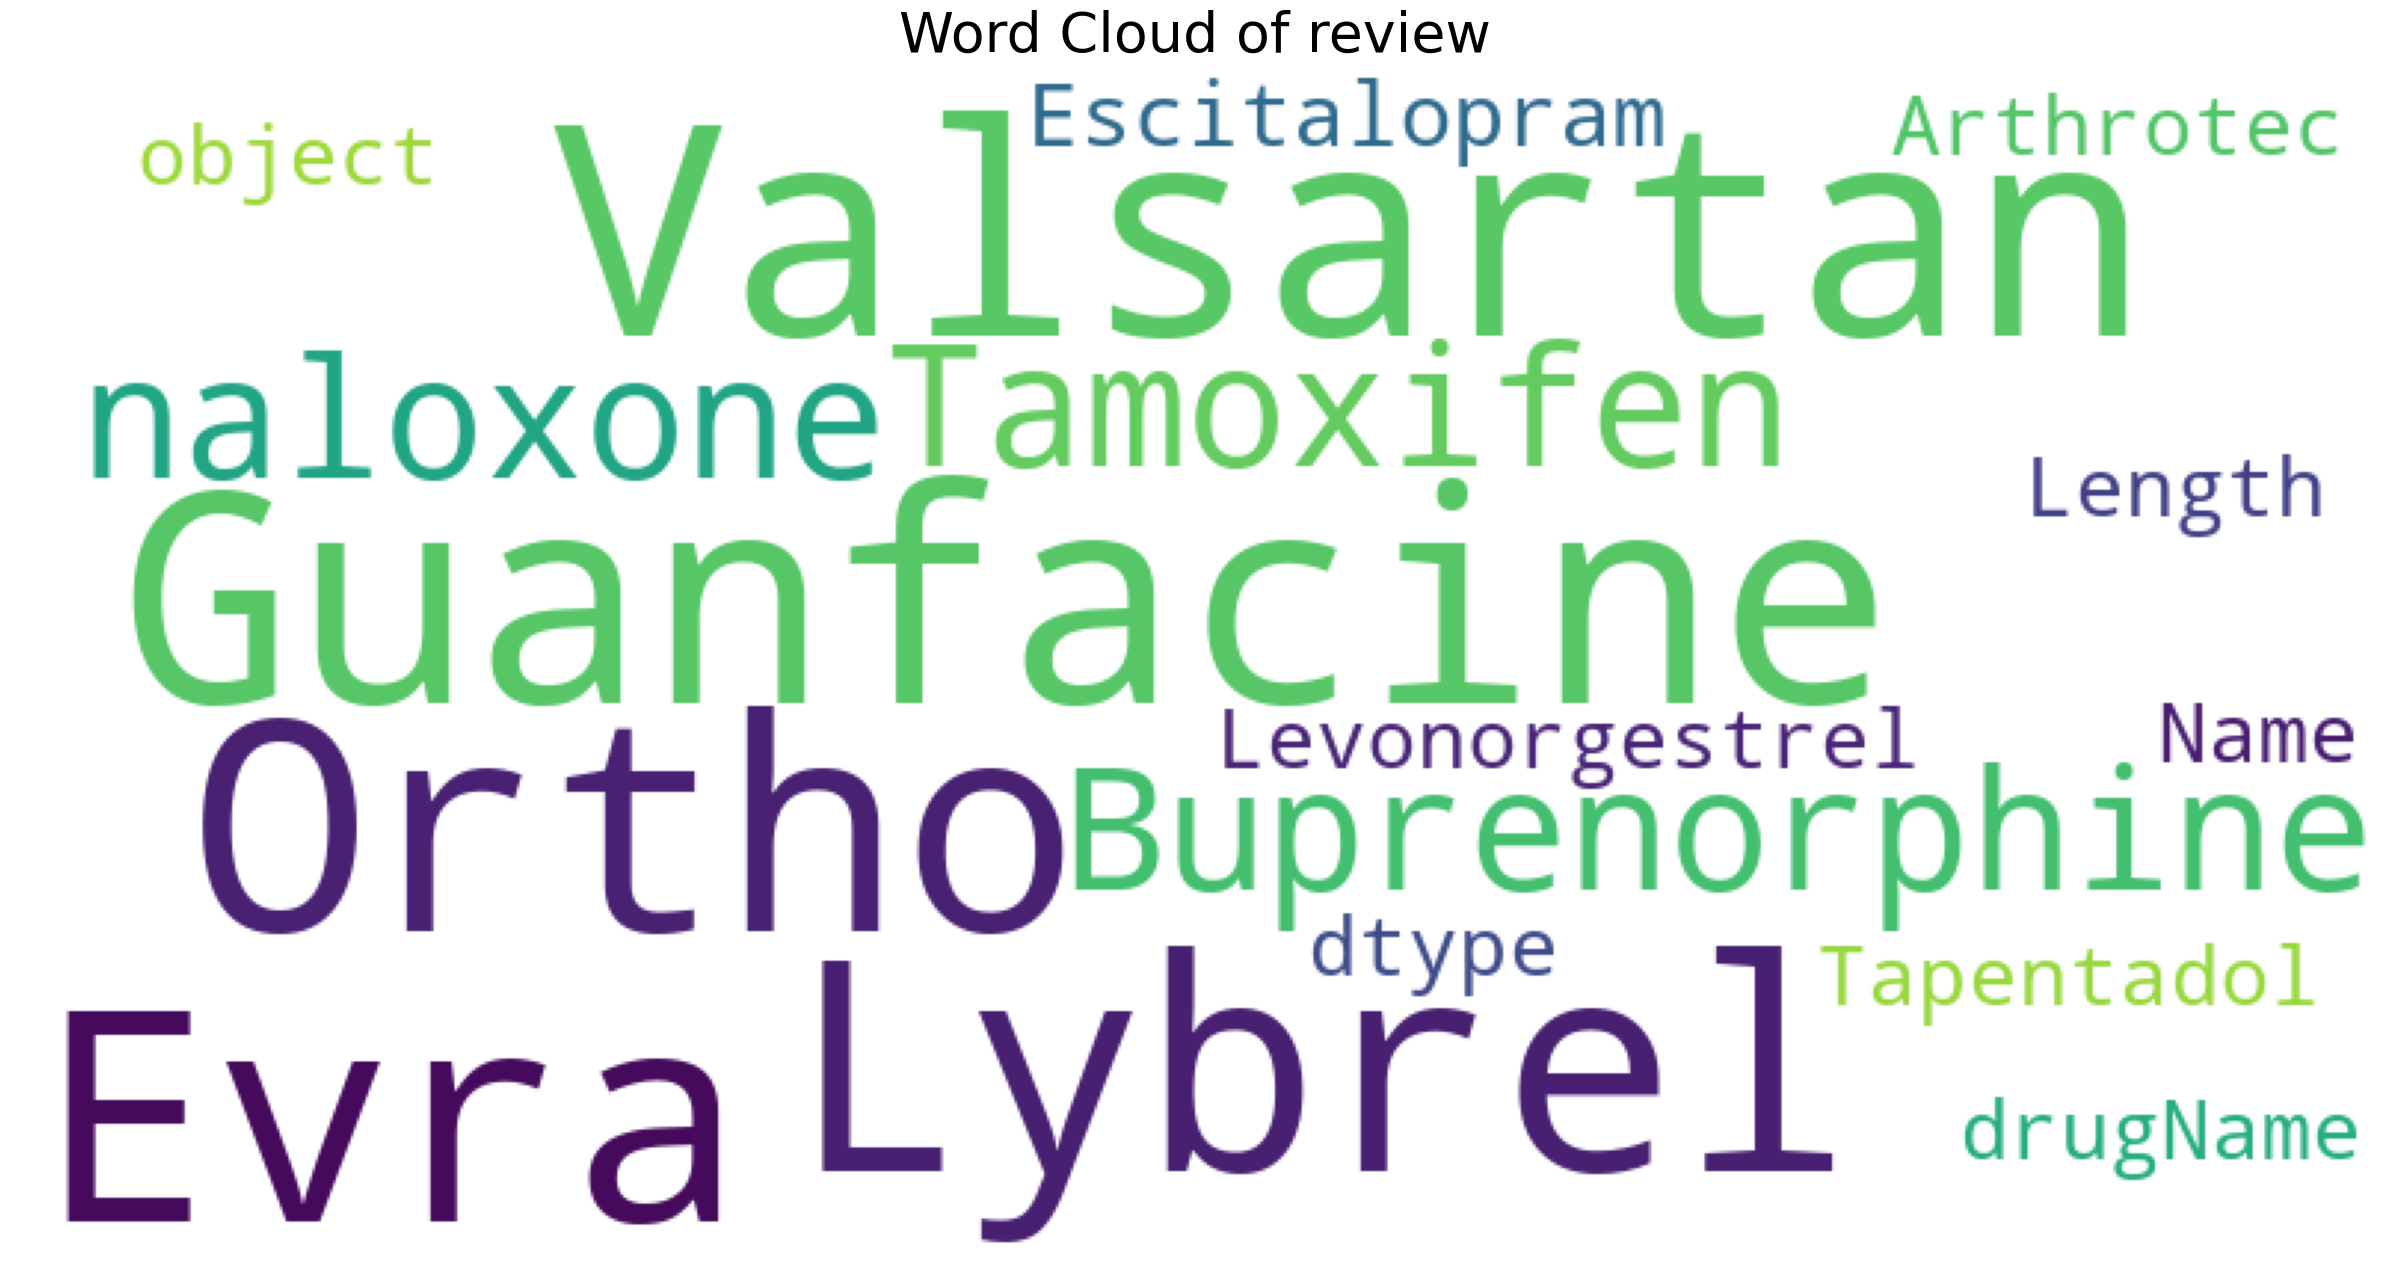

In [15]:
print()   
print()
plot_wordcloud(df["drugName"], title="Word Cloud of review")

.

.

In [ ]:
# classify 1 to 5 as negative, and 6 to10 as positive, and we will check through 1 ~ 4 grams which corpus best classifies emotions.

In [16]:
df_6_10 = df[df["rating"]>5]
df_1_5 = df[df["rating"]<6]

In [21]:

from collections import defaultdict


def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

def horizontal_bar_chart(d, color):
    trace = go.Bar(
        y=d["word"].values[::-1],
        x=d["wordcount"].values[::-1],
        showlegend=False,
        orientation='h',
        marker=dict(
            color=color,
        ),
    )
    return trace

def plot_ngrams_bar_charts(df_1_5, df_6_10, n_gram=1):
    # Get the bar chart from rating 1 to 5 review
    freq_dict = defaultdict(int)
    for sent in df_1_5["review"]:
        for word in generate_ngrams(sent, n_gram):
            freq_dict[word] += 1
    fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
    fd_sorted.columns = ["word", "wordcount"]
    trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

    # Get the bar chart from rating 6 to 10 review
    freq_dict = defaultdict(int)
    for sent in df_6_10["review"]:
        for word in generate_ngrams(sent, n_gram):
            freq_dict[word] += 1
    fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
    fd_sorted.columns = ["word", "wordcount"]
    trace1 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

    # Creating two subplots
    fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                              subplot_titles=["Frequent words of rating 1 to 5", 
                                              "Frequent words of rating 6 to 10"])
    fig.append_trace(trace0, 1, 1)
    fig.append_trace(trace1, 1, 2)
    fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
    py.iplot(fig, filename='word-plots')

# Example usage



**for_1_gram**

C:\Users\Windows\anaconda3\Lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



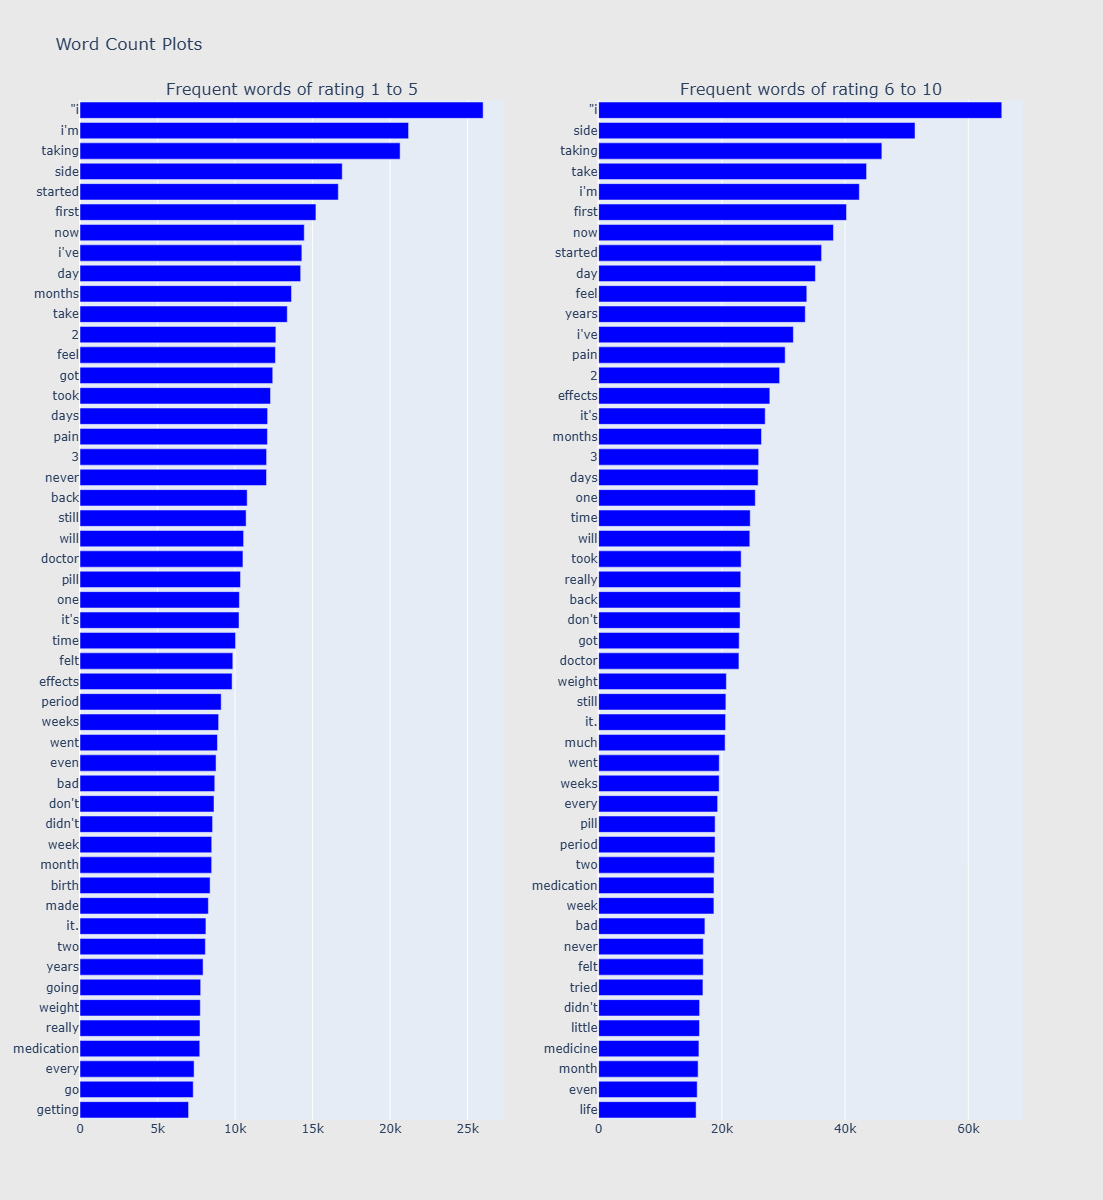

In [22]:
plot_ngrams_bar_charts(df_1_5, df_6_10, n_gram=1)    # for 1 gram

**for_2_gram**

C:\Users\Windows\anaconda3\Lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



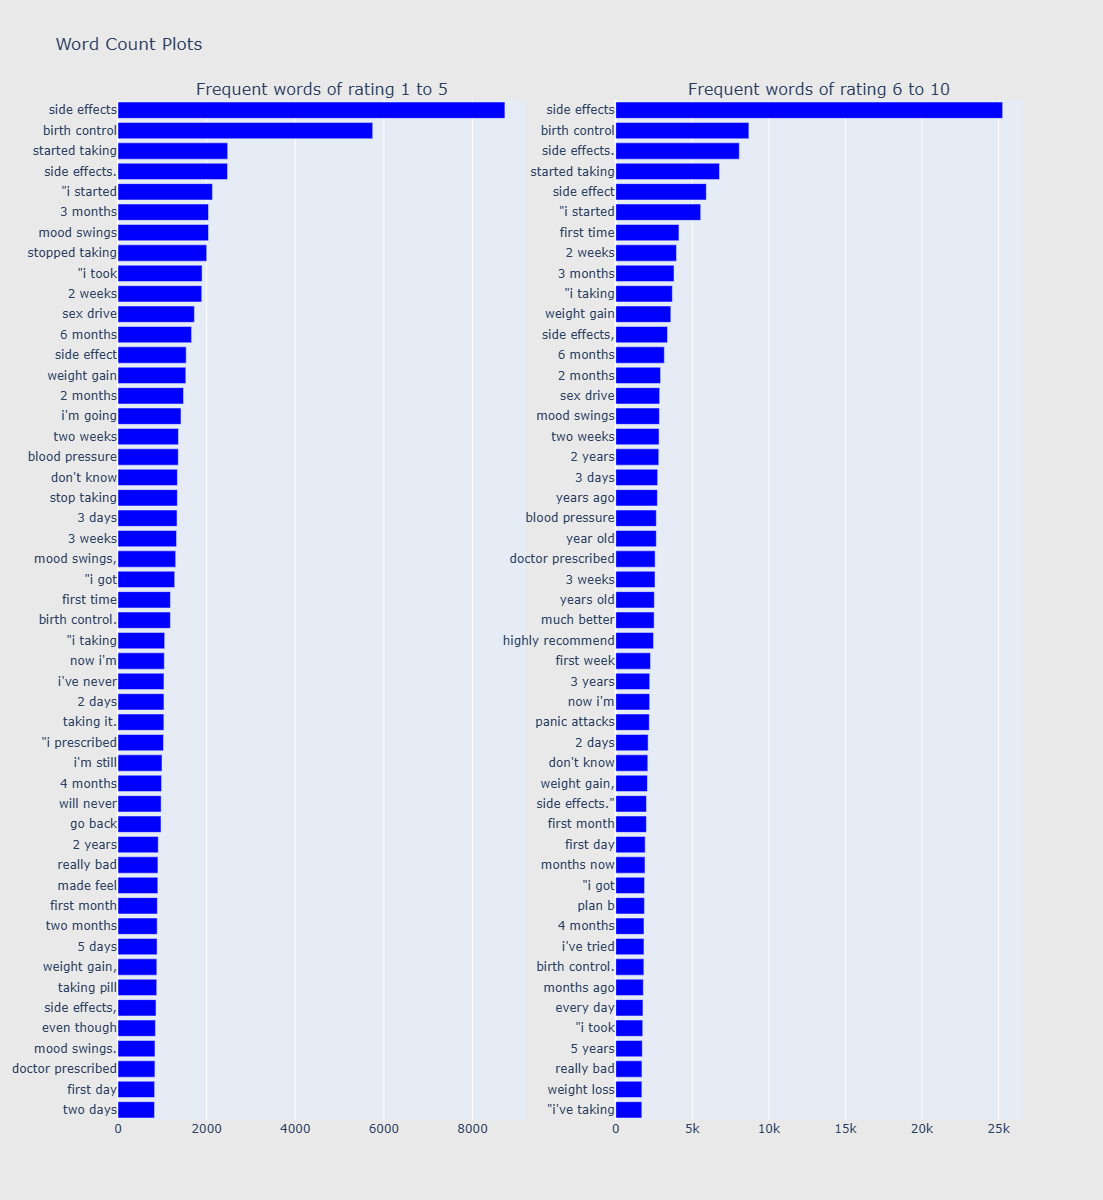

In [23]:
plot_ngrams_bar_charts(df_1_5, df_6_10, n_gram=2)    # for 2 gram

**for_3_gram**

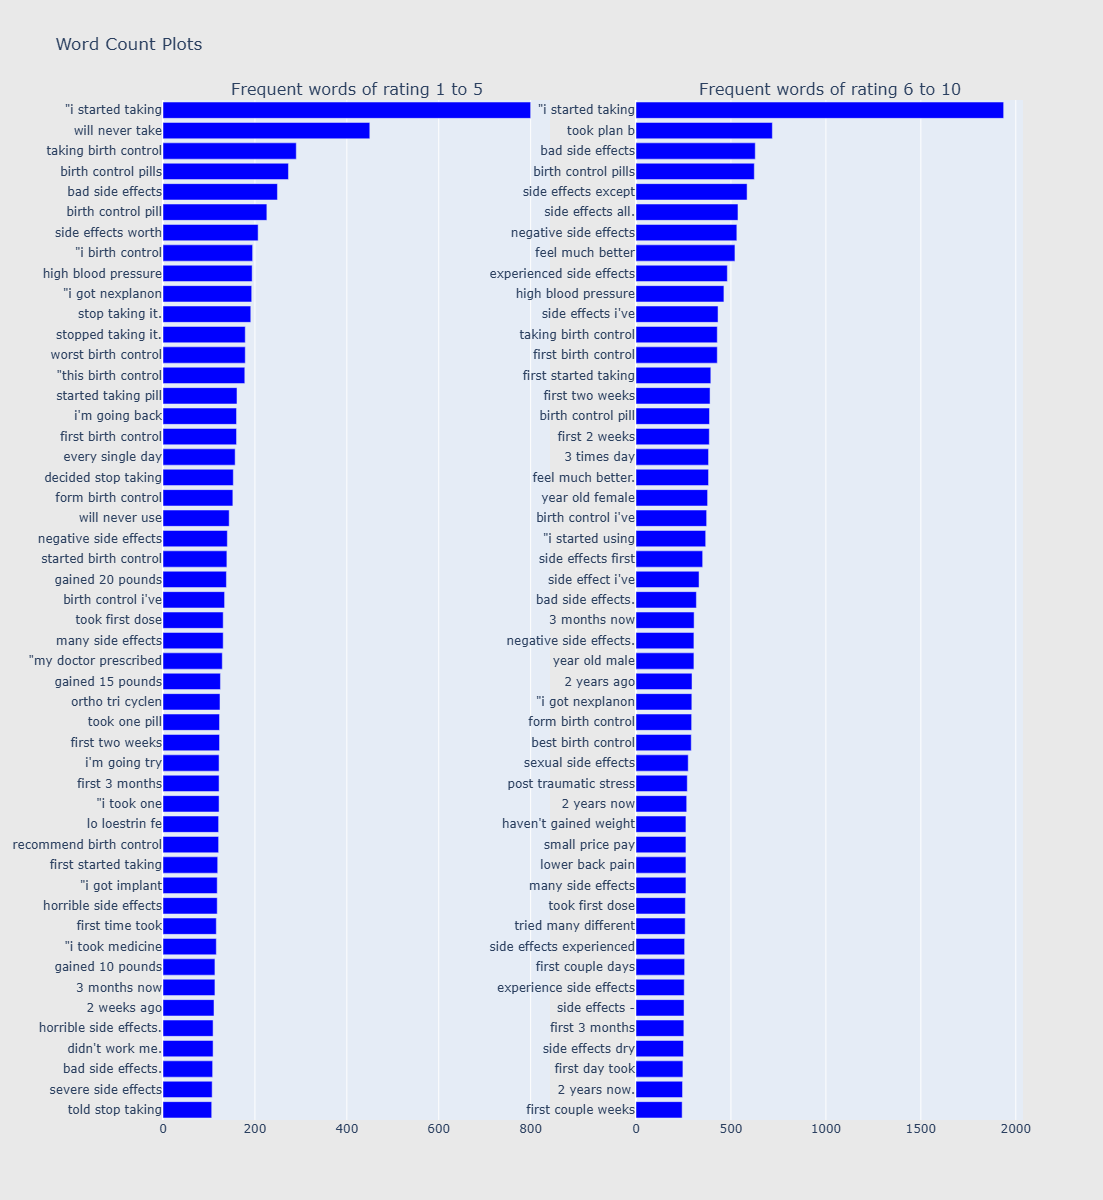

In [24]:
plot_ngrams_bar_charts(df_1_5, df_6_10, n_gram=3)    # for 1 gram

**for_4_gram**

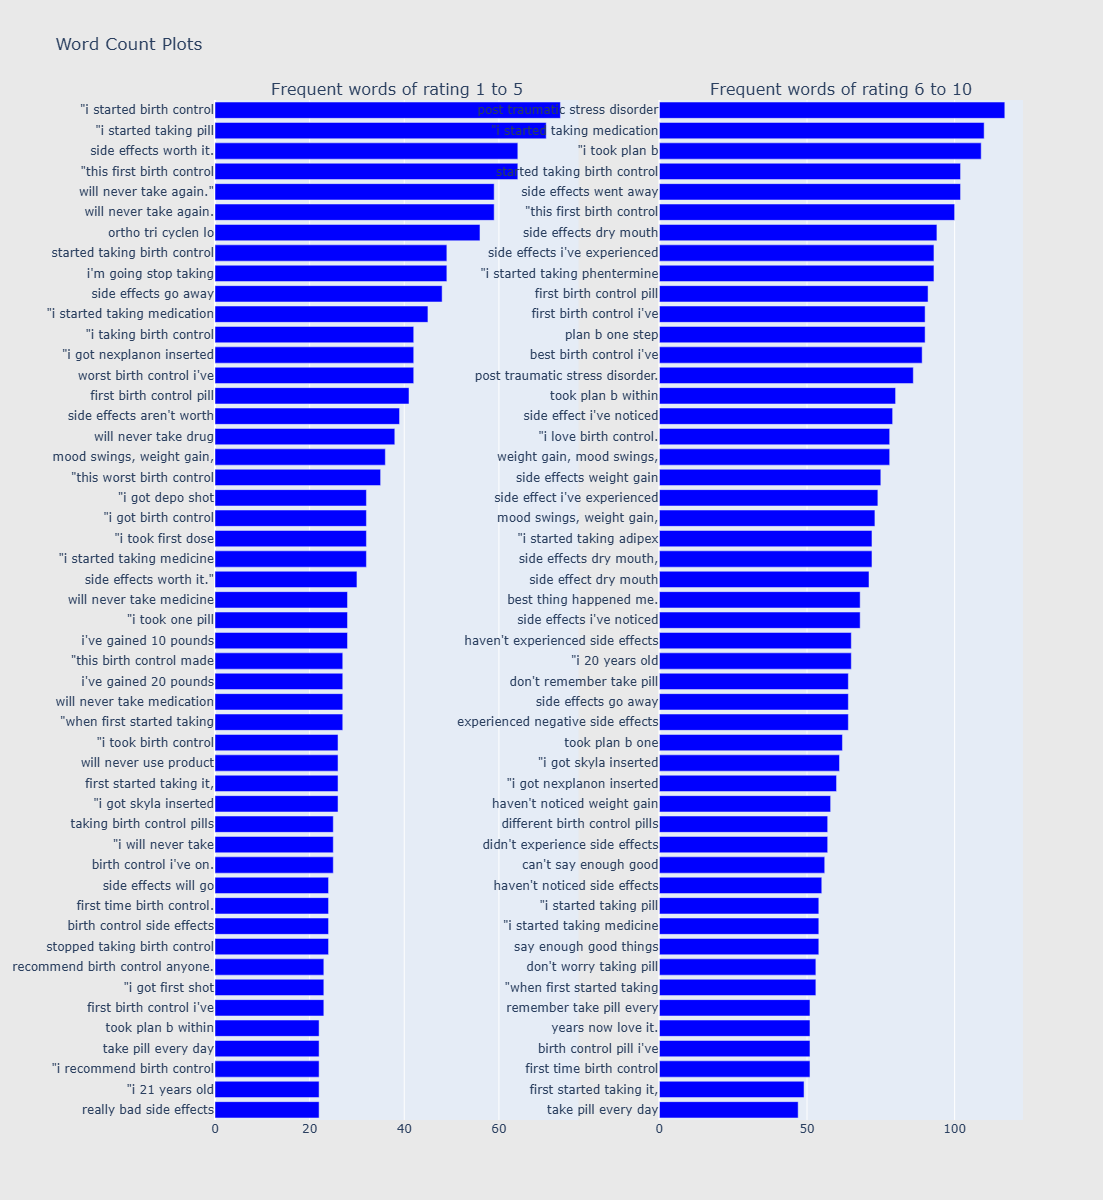

In [25]:
plot_ngrams_bar_charts(df_1_5, df_6_10, n_gram=4)    # for 4 gram

.

4-gram classifies much betther than other grams.

.

**Dropping_the_columns**

In [26]:
df.shape

(213869, 7)

In [114]:
df.columns

Index(['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [27]:
df.drop(['Unnamed: 0','rating', 'date','usefulCount'],axis=1,inplace=True)

In [28]:
df.columns

Index(['drugName', 'condition', 'review'], dtype='object')

**To_make_it_simple_we_will_select_the_top_4_medical_conditions_i.e.,_Birth_Control,_Depression,Pain_,Anxiety.**

In [29]:
df_train = df[(df['condition']=='Birth Control') | (df['condition']=='Depression') | (df['condition']=='Pain')|(df['condition']=='Anxiety')]

In [30]:
df_train['condition'].value_counts(ascending=False) 

condition
Birth Control    38436
Depression       12164
Pain              8245
Anxiety           7812
Name: count, dtype: int64

In [17]:
pd.DataFrame(index=df['condition'].value_counts().index,data=df['condition'].value_counts().values)

,0
condition,
Birth Control,38436
Depression,12164
Pain,8245
Anxiety,7812
Acne,7435
...,...
Systemic Candidiasis,1
Wilson's Disease,1
unctional Gastric Disorde,1


In [ ]:
#df[df['condition']=='Depression']

**Removing_unwanted_symbol**

1.As we can observe from the sample reviews, it contains special symbols, “\r\n”, “”, etc.

2.So first we will remove double quotes from the dataset.

In [211]:
for i, col in enumerate(df_train.columns):
    df_train.iloc[:, i] = df_train.iloc[:, i].str.replace('"', '')           # removing double quotes  ("  ")        

In [212]:
# Remove '&', '#', and '&#' from the 'review' column
df_train['review'] = df_train['review'].str.replace(r'&|#|&#', '', regex=True)


In [213]:
for i in df_train['review'][0:10]:
    print(i)
    print('_______________________________________________________________')

I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it039;s the end of the third week- I still have daily brown discharge.
The positive side is that I didn039;t have any other side effects. The idea of being period free was so tempting... Alas.
_______________________________________________________________
This is my first time using any form of birth control. I039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downs

**Pre-Processing**

**Creating_of_bag_of_words**

In [31]:
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import pandas as pd
import nltk

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Assuming df_train is your DataFrame and contains the 'review' and 'condition' columns
stop = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def review_to_words(raw_review):
    # 1. Delete HTML
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Replace non-alphabetic characters with space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. Convert to lowercase
    words = letters_only.lower().split()
    # 4. Remove stopwords
    meaningful_words = [w for w in words if w not in stop]
    # 5. Lemmatization
    lemmatized_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    # 6. Join words with space
    return ' '.join(lemmatized_words)

# Apply the preprocessing function to the 'review' column
df_train['review_clean'] = df_train['review'].apply(review_to_words)

# Creating feature and target variables
X_feat = df_train['review_clean']
y = df_train['condition']

# Display the DataFrame
df_train.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Windows\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Windows\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,drugName,condition,review,review_clean
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",used take another oral contraceptive pill cycl...
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",first time using form birth control glad went ...
9,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",pill many year doctor changed rx chateal effec...
11,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",taken anti depressant year improvement mostly ...
14,Nexplanon,Birth Control,"""Started Nexplanon 2 months ago because I have...",started nexplanon month ago minimal amount con...


In [33]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np


# Reshape y to be 2D
data= np.array(y).reshape(-1, 1)


# Define the order of categories
categories = [['Birth Control','Depression','Pain', 'Anxiety']]

# Initialize OrdinalEncoder with predefined categories
ordinal_encoder = OrdinalEncoder(categories=categories)

# Fit and transform the data
encoded_y = ordinal_encoder.fit_transform(data)

# Update y with encoded values
y=encoded_y


In [205]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [34]:
y.shape

(66657, 1)

.

After doing prepocessing step ,As we can see from the above output reviews are not cleaned properly which we can use for vectorizing using TF-IDF.

.

In [197]:
#In the previous step, we have already created a feature and target variable. So, next, we will proceed to Train Test split.

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_feat, y,stratify=y,test_size=0.2, random_state=0)

In [ ]:
#Using 80% of the data for training the model and rest 20% for testing the model.

In [36]:
X_train.head()

140506    pill month stopped two day ago pregnancy scare...
150445    opana excellent medication taken oxycontin mg ...
30910     got paraguard yesterday experience pretty fres...
27906     first got implanon july month later period wee...
31179     year old diagnosed depression went gp prescrib...
Name: review_clean, dtype: object

In [54]:
y_train.head()

44389    Birth Control
366         Depression
13035    Birth Control
18866             Pain
12737       Depression
Name: condition, dtype: object

.

****Confusion matrix****

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


.

**TF_idf**

In [ ]:
 #vectorize the data using TF-IDF and use bi-grams for the same

**2-gram**

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer2 = TfidfVectorizer(max_df=0.8, ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer2.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer2.transform(X_test)


accuracy:   0.770
Confusion matrix, without normalization


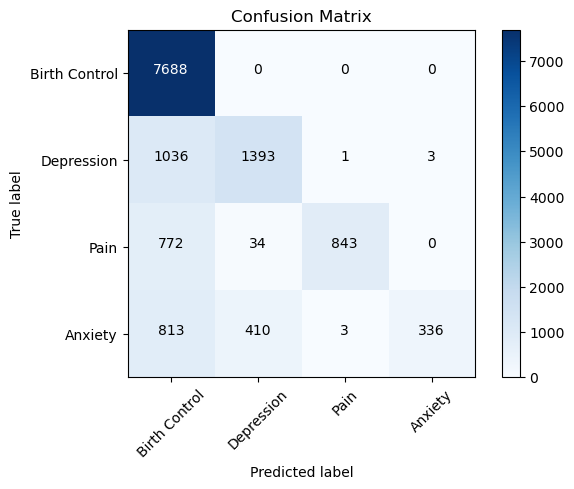

In [40]:
from sklearn.naive_bayes import MultinomialNB
mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train_2, y_train)
pred = mnb_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=[0,1,2,3])
plot_confusion_matrix(cm, classes=['Birth Control','Depression','Pain', 'Anxiety'])

**Passive classifier 2-gram**

accuracy:   0.973
Confusion matrix, without normalization


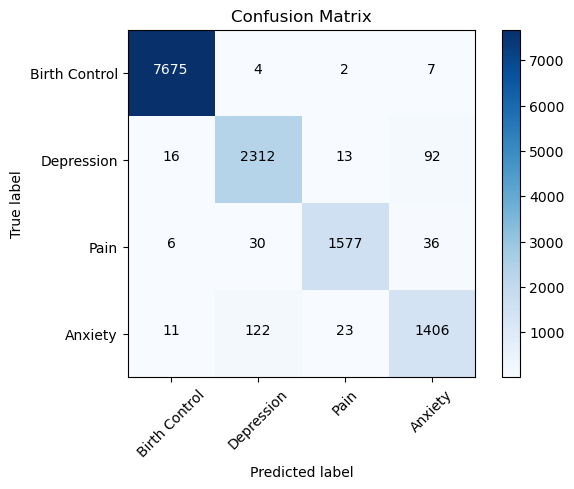

In [41]:
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_2, y_train)
pred = pass_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=[0,1,2,3])
plot_confusion_matrix(cm, classes=['Birth Control','Depression','Pain', 'Anxiety'])

**Trigram**

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer3 = TfidfVectorizer(max_df=0.8, ngram_range=(1,3))
tfidf_train_3 = tfidf_vectorizer3.fit_transform(X_train)
tfidf_test_3 = tfidf_vectorizer3.transform(X_test)



**Trigram for multinomial navis bayes**

accuracy:   0.731
Confusion matrix, without normalization


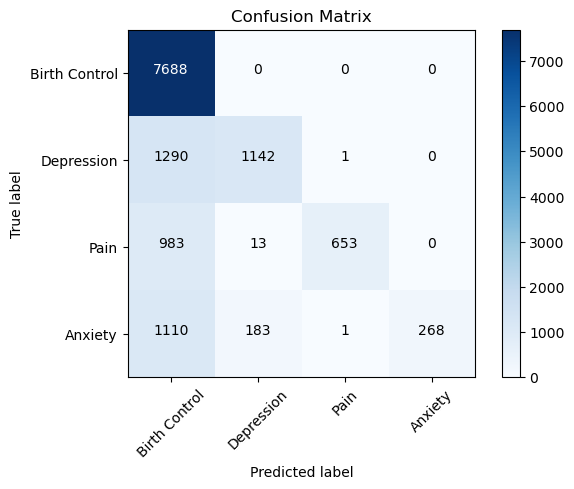

In [44]:

from sklearn.naive_bayes import MultinomialNB
mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train_3, y_train)
pred = mnb_tf.predict(tfidf_test_3)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=[0,1,2,3])
plot_confusion_matrix(cm, classes=['Birth Control','Depression','Pain', 'Anxiety'])

**Trigram for passive classifier**

accuracy:   0.973
Confusion matrix, without normalization


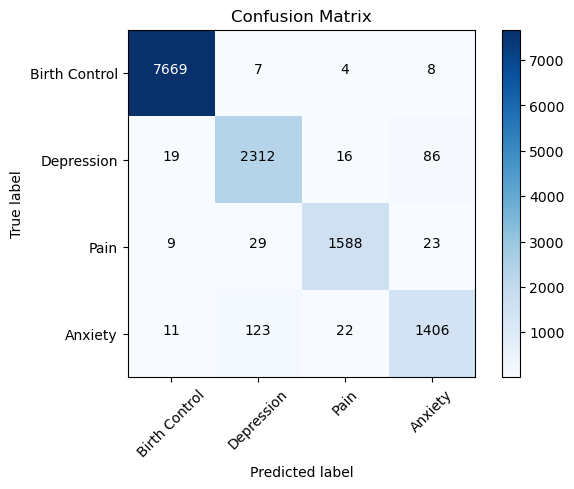

In [45]:
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_3, y_train)
pred = pass_tf.predict(tfidf_test_3)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=[0,1,2,3])
plot_confusion_matrix(cm, classes=['Birth Control','Depression','Pain', 'Anxiety'])



In [ ]:
##model building

In [ ]:
## testing the new data

In [48]:


# Assuming df and other required variables (e.g., tfidf_vectorizer2, mnb_tf, review_to_words) are already defined
df = dff

def top_drugs_extractor(condition):
    df_top = df[(df['rating'] >= 9) & (df['usefulCount'] >= 100)].sort_values(by=['rating', 'usefulCount'], ascending=[False, False])
    drug_lst = df_top[df_top['condition'] == condition]['drugName'].head(3).tolist()
    return drug_lst if drug_lst else ['No top drugs available']  # Handling case when no drugs are found

def predict_text(lst_text):
    df_test = pd.DataFrame(lst_text, columns=['test_sent'])
    df_test["test_sent"] = df_test["test_sent"].apply(review_to_words)
    tfidf_bigram = tfidf_vectorizer2.transform(df_test["test_sent"])
    prediction = mnb_tf.predict(tfidf_bigram)
    df_test['prediction'] = prediction
    return df_test

sentences = [
    "I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations.",
    "This is the third med I've tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am and changing asap.",
    "I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I am losing so much weight. No side effects yet. Miracle medicine for me"
]

# Combine sentences into one string
combined_text = ' '.join(sentences)

# Predict using the combined text
df_predictions = predict_text([combined_text])  # Pass combined_text as a list

# Extract and print results
text = combined_text
label = df_predictions['prediction'][0]
    
# Map the label to the condition
if label == "High Blood Pressure":
    target = "High Blood Pressure"
elif label == "Depression":
    target = "Depression"
elif label == "Diabetes, Type 2":
    target = "Diabetes, Type 2"
else:
    target = "Birth Control"

top_drugs = top_drugs_extractor(target)

# Print results
print("Condition:", target)
print("Top 3 Suggested Drugs:")
for drug in top_drugs:
    print(drug)
print()


Condition: Birth Control
Top 3 Suggested Drugs:
Mirena
Levonorgestrel
Implanon



In [ ]:
# here  model predicted the condition as birth control
#recommended drugs
 #1.Mirena
 #2Levonorgestrel
 #3Implanon